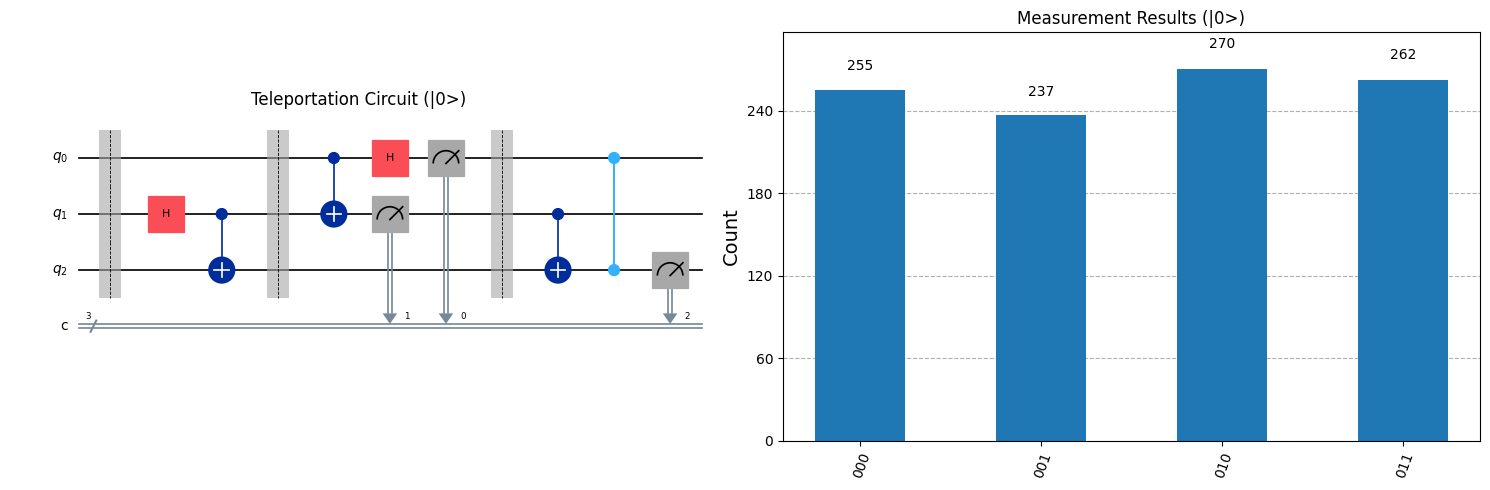

Teleportation Results for |0>: {'010': 270, '011': 262, '001': 237, '000': 255}



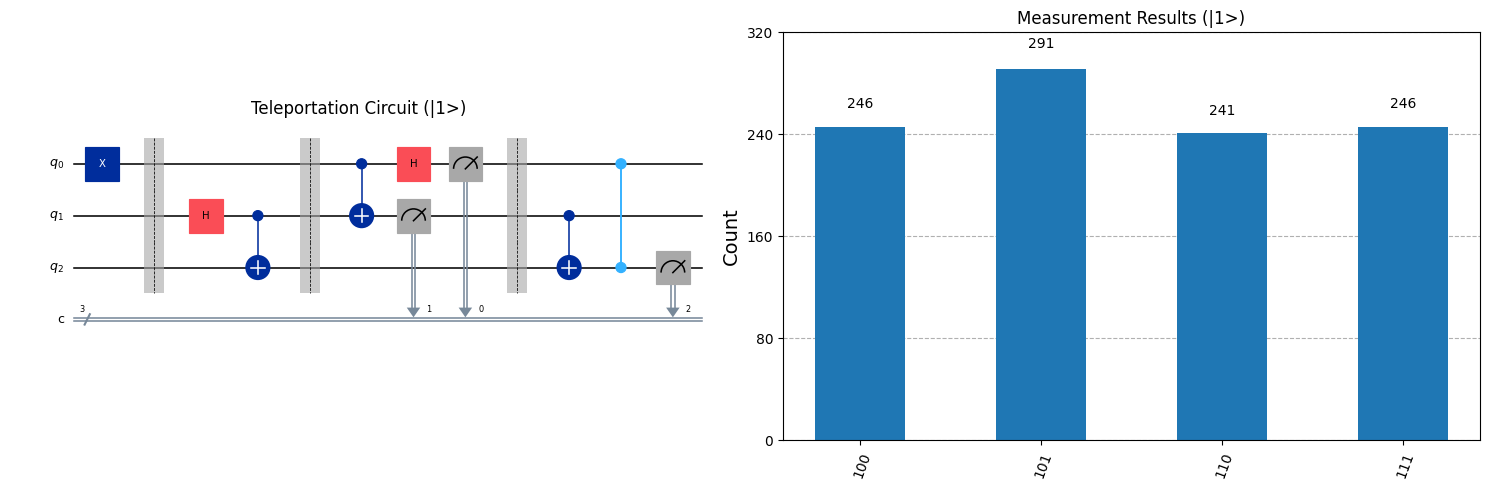

Teleportation Results for |1>: {'100': 246, '110': 241, '101': 291, '111': 246}



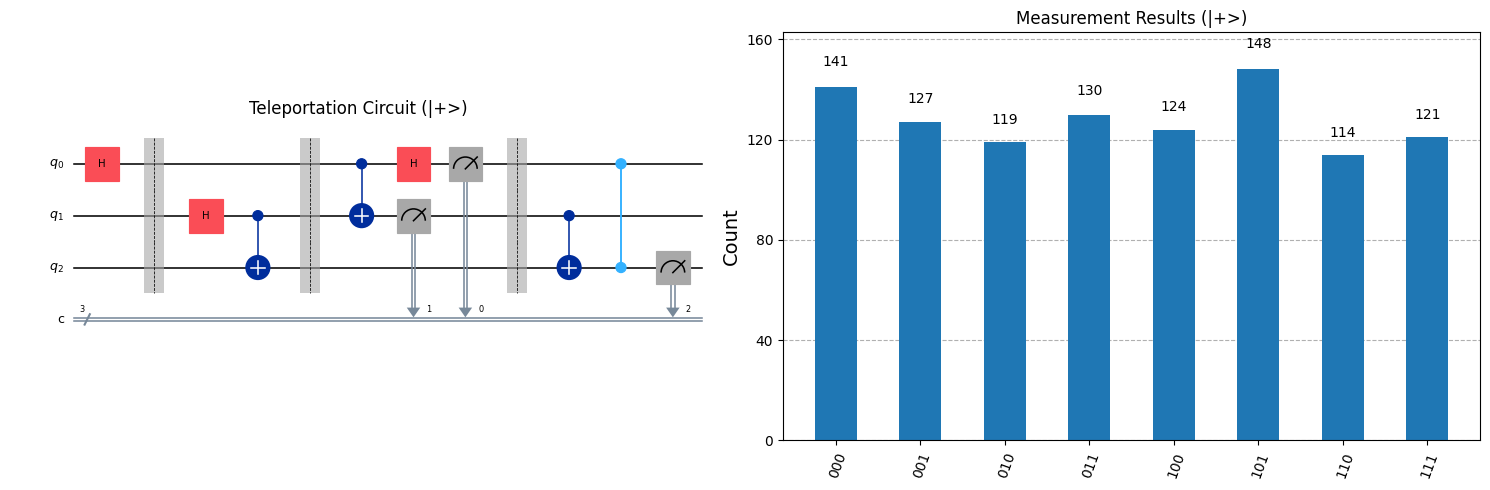

Teleportation Results for |+>: {'010': 119, '101': 148, '000': 141, '111': 121, '011': 130, '100': 124, '001': 127, '110': 114}



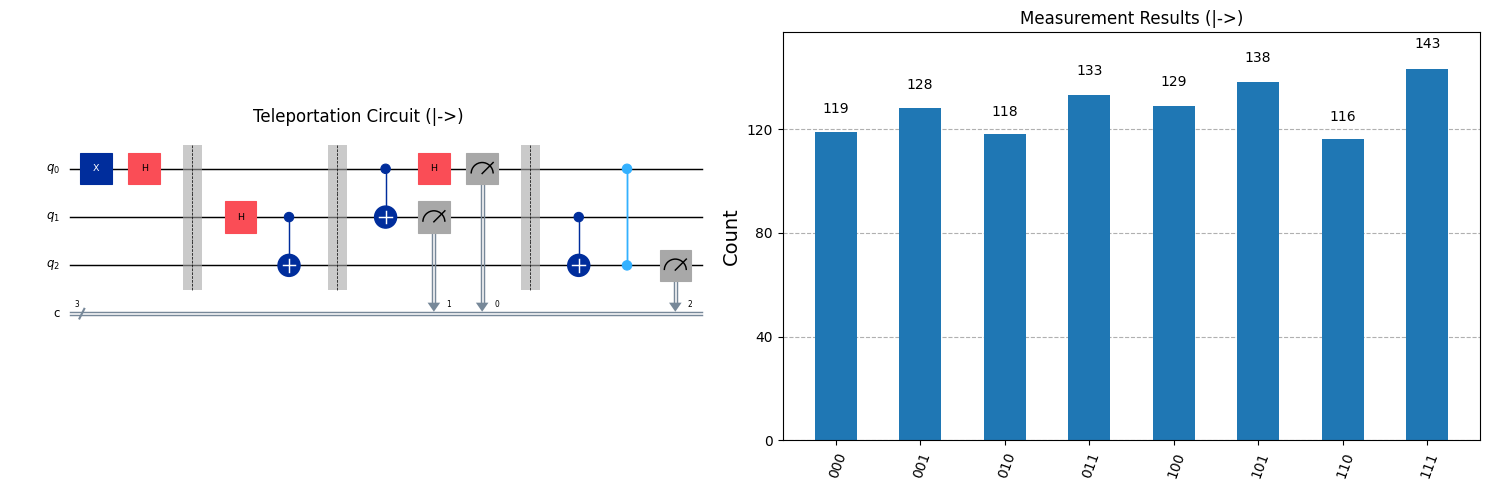

Teleportation Results for |->: {'010': 118, '011': 133, '111': 143, '110': 116, '000': 119, '001': 128, '100': 129, '101': 138}



In [1]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt

def teleport_qubit(input_state):
    # 3-qubit circuit
    qc = QuantumCircuit(3,3)

    # Prepare input state
    if input_state == '|0>':
        pass
    elif input_state == '|1>':
        qc.x(0)
    elif input_state == '|+>':
        qc.h(0)
    elif input_state == '|->':
        qc.x(0)
        qc.h(0)
    else:
        raise ValueError("Invalid input state")

    qc.barrier()

    # Entanglement
    qc.h(1)
    qc.cx(1,2)
    qc.barrier()

    # Bell measurement
    qc.cx(0,1)
    qc.h(0)

    # Statevector BEFORE measurement for Bloch sphere
    sv_circuit = qc.copy()
    sv = Statevector.from_instruction(sv_circuit)

    # Measurements
    qc.measure([0,1],[0,1])
    qc.barrier()
    qc.cx(1,2)
    qc.cz(0,2)
    qc.measure(2,2)

    # Simulation
    sim = AerSimulator()
    job = sim.run(qc)
    result = job.result()
    counts = result.get_counts()

    # Visualization
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
    qc.draw('mpl', ax=ax1)
    ax1.set_title(f'Teleportation Circuit ({input_state})')
    plot_histogram(counts, ax=ax2)
    ax2.set_title(f'Measurement Results ({input_state})')
    plt.tight_layout()
    plt.show()

    # Plot Bloch sphere separately
    plot_bloch_multivector(sv, title=f'Bob Qubit State BEFORE Measurement ({input_state})')

    print(f"Teleportation Results for {input_state}: {counts}\n")

# Test all input states
for state in ['|0>', '|1>', '|+>', '|->']:
    teleport_qubit(state)